In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
from mpl_toolkits.mplot3d import Axes3D

In [4]:
path = Path('/home/hendrix/projects/headpose/')

In [5]:
path.ls()

[PosixPath('/home/hendrix/projects/headpose/headPose.jpg'),
 PosixPath('/home/hendrix/projects/headpose/learnopencv'),
 PosixPath('/home/hendrix/projects/headpose/.ipynb_checkpoints'),
 PosixPath('/home/hendrix/projects/headpose/io_sample.cpp'),
 PosixPath('/home/hendrix/projects/headpose/dlib'),
 PosixPath('/home/hendrix/projects/headpose/HeadposeTest.ipynb'),
 PosixPath('/home/hendrix/projects/headpose/lesson1-pets.ipynb'),
 PosixPath('/home/hendrix/projects/headpose/install-opencv.sh'),
 PosixPath('/home/hendrix/projects/headpose/.idea'),
 PosixPath('/home/hendrix/projects/headpose/nb1.ipynb'),
 PosixPath('/home/hendrix/projects/headpose/readme.txt'),
 PosixPath('/home/hendrix/projects/headpose/data'),
 PosixPath('/home/hendrix/projects/headpose/OpenCV')]

In [6]:
data_path = path/'data'; data_path.ls()

[PosixPath('/home/hendrix/projects/headpose/data/hpdb'),
 PosixPath('/home/hendrix/projects/headpose/data/head_pose_masks'),
 PosixPath('/home/hendrix/projects/headpose/data/annos')]

In [7]:
imagetext_path = data_path/'hpdb/'

In [8]:
imagetext_path

PosixPath('/home/hendrix/projects/headpose/data/hpdb')

In [9]:
mask_path = data_path/'head_pose_masks'

In [18]:
masks = get_image_files(mask_path, recurse=True)

In [17]:
imgs = get_image_files(imagetext_path, recurse=True)

In [93]:
txts = get_files(imagetext_path, recurse=True, extensions='.txt')

In [13]:
img = imgs[1]

In [14]:
imgtxt = str(img).replace('rgb.png', 'pose.txt'); imgtxt

'/home/hendrix/projects/headpose/data/hpdb/09/frame_00667_pose.txt'

In [15]:
msk = str(img).replace('hpdb/09/frame_00667_rgb.png', 
                       'head_pose_masks/09/frame_00667_depth_mask.png'); msk

'/home/hendrix/projects/headpose/data/head_pose_masks/09/frame_00667_depth_mask.png'

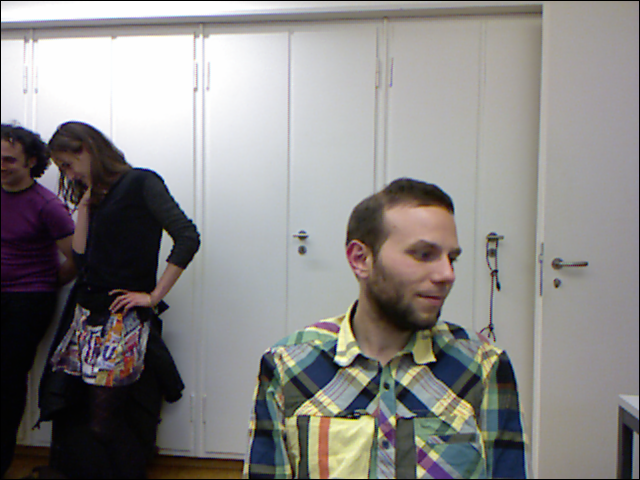

In [16]:
image = open_image(img); image

In [19]:
anno = open(imgtxt).read(); print(anno) 

0.804344 -0.193884 -0.56164 
0.145617 0.98076 -0.130024 
0.576043 0.0227998 0.817101 

187.332 40.3892 893.135 




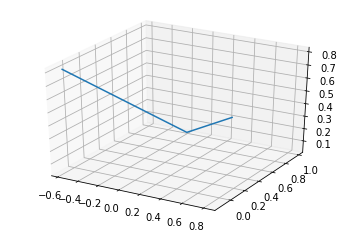

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X, Y, Z = [0.804344, -0.193884, -0.56164], [0.145617, 0.98076, -0.130024], [0.576043, 0.0227998, 0.817101]
ax.plot3D(X, Y, Z)

In [21]:
coords = [float(x) for x in anno.split("\n")[-3].split(' ')[:3]]; coords

[187.332, 40.3892, 893.135]

In [22]:
intr = [[517.679, 0, 320],
[0, 517.679, 240.5],
[0, 0, 1]]


c1 = coords[0] * intr[0][0]/coords[2] + intr[0][2]
c2 = coords[1] * intr[1][1]/coords[2] + intr[1][2]

In [23]:
coordinates = [c2, c1]

In [82]:
c1

428.58139298986157

In [83]:
c2

263.91039223275317

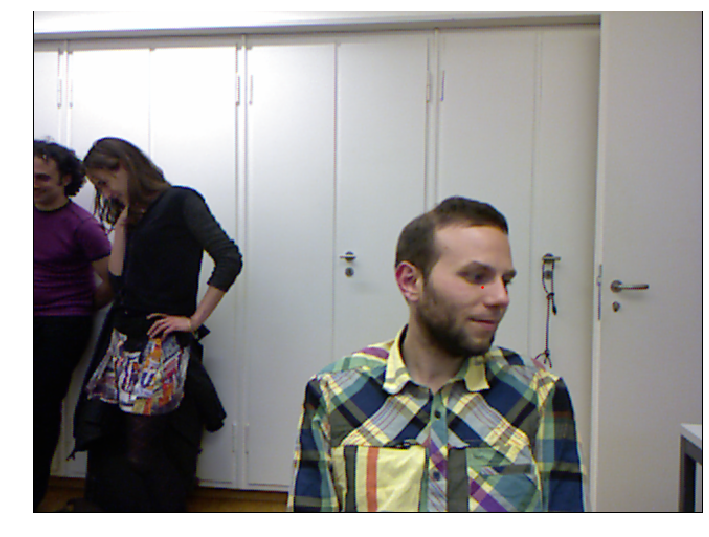

In [78]:
pnts = torch.tensor([coordinates])
pnts = ImagePoints(FlowField(image.size, pnts), scale=True)
image.show(y=pnts, figsize=(12, 12))

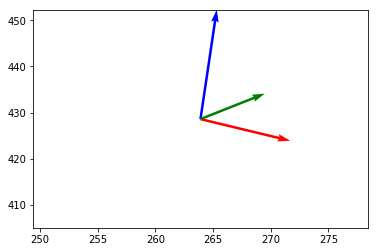

In [91]:
t = np.array([[.804, -.194], [.146, .981], [.576, .228]])
origin = [263.91], [428.458]
plt.quiver(*coordinates, t[:,0], t[:,1], color=['r', 'b', 'g'], scale=3)

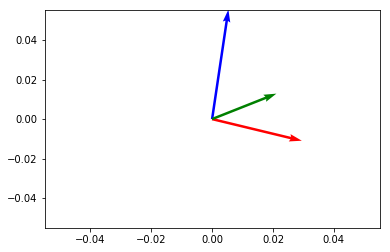

In [36]:
t = np.array([[.804, -.194], [.146, .981], [.576, .228]])
origin = [0], [0]
plt.quiver(*origin, t[:,0], t[:,1], color=['r', 'b', 'g'], scale=3)

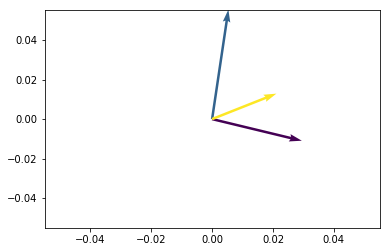

In [62]:
t = np.array([[.804, -.194, -.562], [.146, .981, -.130], [.576, .228, .817]])
origin = [0], [0]
plt.quiver(*origin, t[:,0], t[:,1], t[:,2], color=['r', 'b', 'g', 'y'], scale=3)

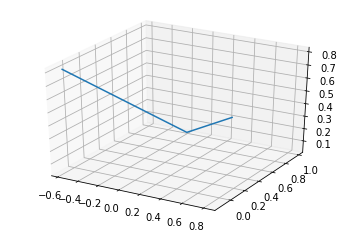

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X, Y, Z = [0.804344, -0.193884, -0.56164], [0.145617, 0.98076, -0.130024], [0.576043, 0.0227998, 0.817101]
ax.plot3D(X, Y, Z)

In [74]:
t = np.array([[.804, -.194, -.562], [.146, .981, -.130], [.576, .228, .817]])
f = t[:,0]; f

array([0.804, 0.146, 0.576])

In [73]:
t = np.array([[.804, -.194, -.562], [.146, .981, -.130], [.576, .228, .817]])
g = t[:,1]; g

array([-0.194,  0.981,  0.228])

In [72]:
t = np.array([[.804, -.194, -.562], [.146, .981, -.130], [.576, .228, .817]])
h = t[:,2]; h

array([-0.562, -0.13 ,  0.817])

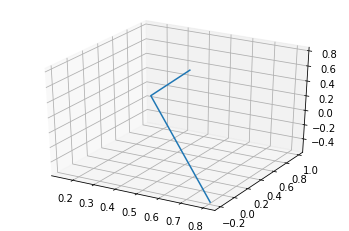

In [71]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(f, g, h)

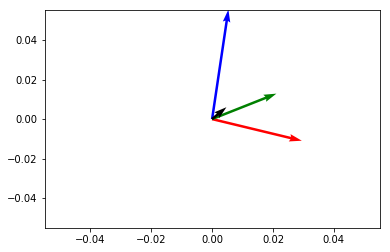

In [35]:
plt.quiver(*origin, t[:,0], t[:,1], color=['r', 'b', 'g'], scale=3)
t12 = t[0] + t[1]
plt.quiver(*origin, t12[0], t12[1])
plt.show()

# image2

In [31]:
img2 = imgs[2]; img2

PosixPath('/home/hendrix/projects/headpose/data/hpdb/09/frame_00559_rgb.png')

In [32]:
imgtxt2 = str(img2).replace('rgb.png', 'pose.txt');imgtxt2

'/home/hendrix/projects/headpose/data/hpdb/09/frame_00559_pose.txt'

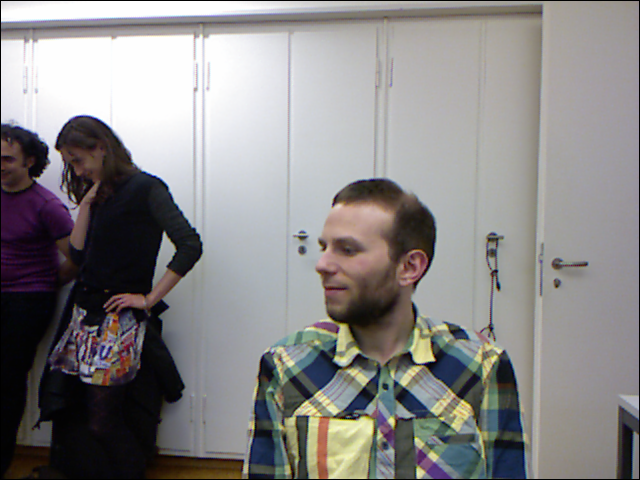

In [33]:
image2 = open_image(img2);image2

In [34]:
anno2 = open(imgtxt2).read(); print(anno2)

0.583177 0.00565441 0.812326 
-0.0116534 0.999931 0.0014058 
-0.812262 -0.0102862 0.583203 

60.7646 30.4651 904.444 




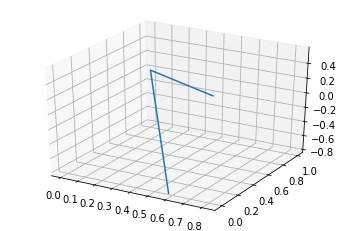

In [35]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X, Y, Z = [0.583177, 0.00565441, 0.812326], [-0.0116534, 0.999931, 0.0014058], [-0.812262, -0.0102862, 0.583203]
ax.plot3D(X, Y, Z)

In [36]:
coords2 = [float(x) for x in anno2.split("\n")[-3].split(' ')[:3]]; coords2

[60.7646, 30.4651, 904.444]

In [37]:
intr = [[517.679, 0, 320],
[0, 517.679, 240.5],
[0, 0, 1]]


c1 = coords2[0] * intr[0][0]/coords2[2] + intr[0][2]
c2 = coords2[1] * intr[1][1]/coords2[2] + intr[1][2]

In [38]:
coordinates2 = [c2, c1]

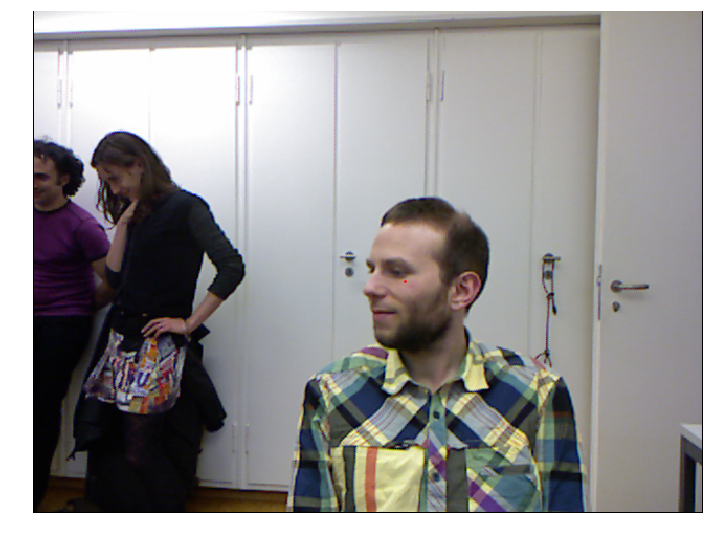

In [39]:
pnts = torch.tensor([coordinates2])
pnts = ImagePoints(FlowField(image2.size, pnts), scale=True)
image2.show(y=pnts, figsize=(12, 12))

In [ ]:
X, Y, Z = [0.583177, 0.00565441, 0.812326], [-0.0116534, 0.999931, 0.0014058], [-0.812262, -0.0102862, 0.583203]

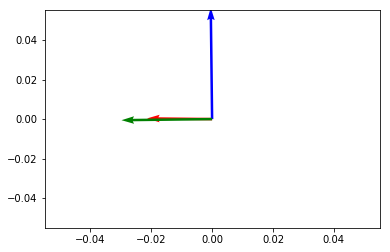

In [48]:
s = np.array([[-.583, .006], [-.012, .999], [-.812, -.010]])
origin = [0], [0]
plt.quiver(*origin, s[:,0], s[:,1], color=['r', 'b', 'g'], scale=3)